<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/Regressor_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,081 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and dire

In [3]:
# perch_full.csv : 길이, 높이, 두께 56 개 -> input
# perch_weight.csv : 무게 -> target

# csv 가져오기 : pandas
import pandas as pd

df = pd.read_csv('/content/perch_full.csv')   # 세선 저장소 업로드 시 부모경로(../) 붙여주기
perch_full = df.to_numpy()  # 배열로
print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [4]:
df = pd.read_csv('/content/perch_weight.csv')
perch_weight = df.to_numpy()
print(perch_weight[:5])
print(perch_weight.shape)

[[ 5.9]
 [32. ]
 [40. ]
 [51.5]
 [70. ]]
(56, 1)


In [5]:
# 훈련세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split

tr_input, ts_input, tr_target, ts_target = train_test_split(perch_full, perch_weight)

print(tr_input.shape, ts_input.shape)   # -> perch_full에서 나뉘어짐
print(tr_target.shape, ts_target.shape) # -> perch_weight에서 나뉘어짐

(42, 3) (14, 3)
(42, 1) (14, 1)


In [6]:
# 사이킷런 변환기로 특성 적용
from sklearn.preprocessing import PolynomialFeatures    # Polynomial : 다항

poly = PolynomialFeatures(include_bias=False)
poly.fit(tr_input)  # 훈련먼저
train_poly = poly.transform(tr_input)   # 특성적용하여 변환
test_poly = poly.transform(ts_input)
print(train_poly.shape, test_poly.shape)

(42, 9) (14, 9)


In [13]:
poly.get_feature_names_out()    # 특성 알아내기

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [7]:
# 훈련시키고 평가결과 보기
from sklearn.linear_model import LinearRegression   # 선형회귀 모델
lr = LinearRegression()
lr.fit(train_poly, tr_target)

print(lr.score(train_poly, tr_target))
print(lr.score(test_poly, ts_target))
# 과소적합 : test가 약간 더 높게 나옴

0.9934456001907315
0.9589380858893807


In [8]:
# 특성 개수에 따라 평가결과는???
import numpy as np

train_scores=[]
test_scores=[]

degrees = np.arange(2, 6)   #[2, 3, 4, 5]
#print(degrees)

for dg in degrees:
    poly = PolynomialFeatures(degree=dg, include_bias=False)    # 특성 조합 변경
    poly.fit(tr_input)
    tr_poly = poly.transform(tr_input)  # 특성적용한 변환
    ts_poly = poly.transform(ts_input)
    # 훈련
    lr = LinearRegression()
    lr.fit(tr_poly, tr_target)
    train_scores.append(lr.score(tr_poly, tr_target))
    test_scores.append(lr.score(ts_poly, ts_target))

print(train_scores)
print(test_scores)

[0.9934456001907315, 0.9975175852373542, 0.9998574737728704, 0.9999999999999825]
[0.9589380858893807, 0.944008807878406, -1.4624510671931805, -302.2867954009156]


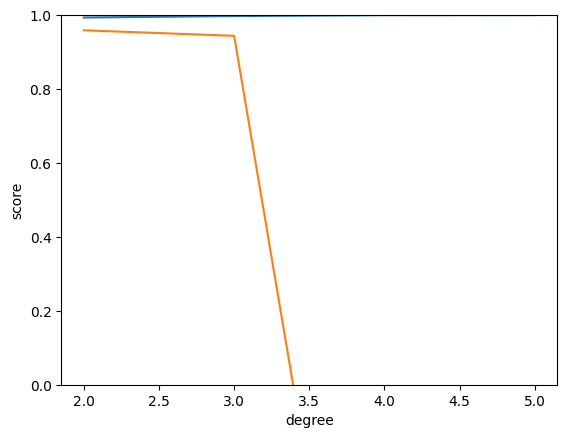

In [9]:
# 결과 그래프화
import matplotlib.pyplot as plt

plt.plot(degrees, train_scores)
plt.plot(degrees, test_scores)
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

In [10]:
# 특성이 많아지면 결과는 정확해지나 평가 결과가 좋지 않다.(과대적합)
# 정규화를 통해 과대적합 방지
# 정규화 이전 degree = 5로  훈련세트 설정(tr_poly, ts_poly)

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(tr_input)
tr_poly = poly.transform(tr_input)
ts_poly = poly.transform(ts_input)

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

## 정규화
* 특징의 영향을 줄여 과적합 방지
* 특징에 곱해지는 w를 줄임 -> 모델을 심플하게 만들고 특징을 줄인다.

## 정규화 방식
* L1 정규화(Lasso)
* L2 정규화(Ridge)



In [11]:
# 먼저 훈련세트를 표준점수화(스케일 조정)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(tr_poly)

tr_scaled = ss.transform(tr_poly)
ts_scaled = ss.transform(ts_poly)

print(tr_scaled.shape, ts_scaled.shape) # 55개의 특성이 적용됨
print(tr_scaled[0])

(42, 55) (14, 55)
[-1.19241622 -1.15934994 -1.02425054 -1.06973286 -1.04521989 -0.99640184
 -1.01731866 -0.97214451 -0.92346089 -0.93843062 -0.92200495 -0.90130619
 -0.90467497 -0.88494147 -0.86263941 -0.88622163 -0.86726759 -0.84564307
 -0.82144112 -0.82692084 -0.81753597 -0.80817212 -0.80784723 -0.79887956
 -0.78791537 -0.79749115 -0.78883921 -0.77807914 -0.76507876 -0.78610152
 -0.77765935 -0.76697766 -0.75392393 -0.73847913 -0.73905466 -0.73488077
 -0.73042787 -0.73057447 -0.72639677 -0.72062163 -0.7258157  -0.72188768
 -0.71627069 -0.70880365 -0.72027067 -0.7165429  -0.71101471 -0.70351554
 -0.69395142 -0.71360542 -0.71000335 -0.70446931 -0.69682486 -0.6869784
 -0.67494022]


In [12]:
# L2 정규화 : Ridge
from sklearn.linear_model import Ridge

l2 = Ridge()
l2.fit(tr_scaled, tr_target)
ridge_score=[]
ridge_score.append(l2.score(tr_scaled, tr_target))
ridge_score.append(l2.score(ts_scaled, ts_target))

In [13]:
# L1 정규화 : Lasso
from sklearn.linear_model import Lasso

l1 = Lasso()
l1.fit(tr_scaled, tr_target)

lasso_score=[]
lasso_score.append(l1.score(tr_scaled, tr_target))
lasso_score.append(l1.score(ts_scaled, ts_target))

Ridge : 99.1% / 97.8%
Lasso : 99.0% / 97.7%


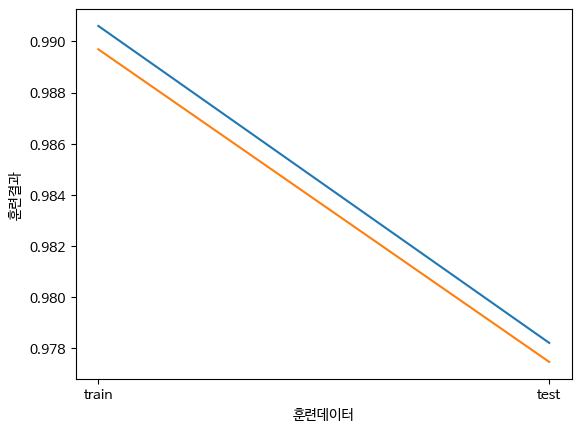

In [14]:
plt.rc('font', family = 'NanumBarunGothic')
xlist = ['train', 'test']
plt.plot(xlist, ridge_score)
plt.plot(xlist, lasso_score)
plt.xlabel('훈련데이터')
plt.ylabel('훈련결과')
print(f"Ridge : {ridge_score[0]:.1%} / {ridge_score[1]:.1%}")
print(f"Lasso : {lasso_score[0]:.1%} / {lasso_score[1]:.1%}")

In [15]:
# L1, L2 정규화 자체의 차이는 크게 없음
# 각 규제의 강도 조절 : alpha

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 10배씩 증가
r_tr_scores = []    # 훈련점수 담을 리스트(릿지)
r_ts_scores = []    # 테스트 점수 담을 리스트(릿지)
ls_tr_score = []    # 훈련점수 담을 리스트(라쏘)
ls_ts_score = []    # 테스트 점수 담을 리스트(라쏘)

In [16]:
for ap in alpha_list:
    ridge = Ridge(alpha=ap)
    ridge.fit(tr_scaled, tr_target)
    r_tr_scores.append(ridge.score(tr_scaled, tr_target))
    r_ts_scores.append(ridge.score(ts_scaled, ts_target))

In [17]:
for ap in alpha_list:
    lasso = Lasso(alpha=ap, max_iter=10000)
    lasso.fit(tr_scaled, tr_target)
    ls_tr_score.append(lasso.score(tr_scaled, tr_target))
    ls_ts_score.append(lasso.score(ts_scaled, ts_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+03, tolerance: 4.533e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.093e+03, tolerance: 4.533e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.983e+02, tolerance: 4.533e

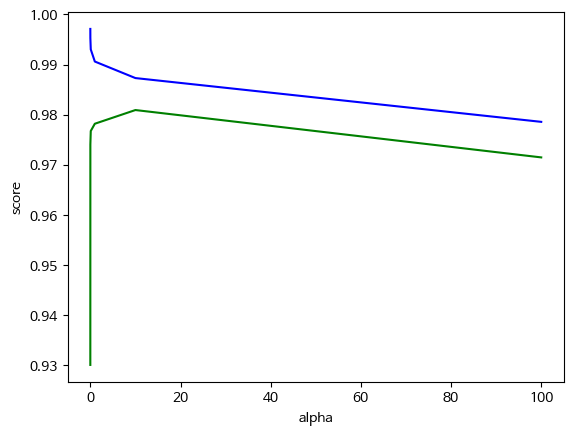

In [18]:
# 결과보기
plt.plot(alpha_list, r_tr_scores, c="b")
plt.plot(alpha_list, r_ts_scores, c="g")

plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

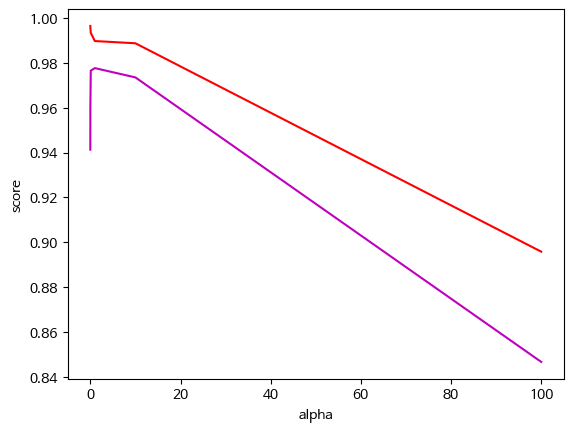

In [19]:
plt.plot(alpha_list, ls_tr_score, c="r")
plt.plot(alpha_list, ls_ts_score, c="m")
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [20]:
# alpha = 0.01 적용하여 훈련, 점수 출력
ridge = Ridge(alpha=0.01)
ridge.fit(tr_scaled, tr_target)
print(ridge.score(tr_scaled, tr_target))
print(ridge.score(ts_scaled, ts_target))


0.9952739953427335
0.9740712384784922


In [21]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(tr_scaled, tr_target)
print(lasso.score(tr_scaled, tr_target))
print(lasso.score(ts_scaled, ts_target))

0.995969134834452
0.9596004848177184


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.093e+03, tolerance: 4.533e+02
  model = cd_fast.enet_coordinate_descent(
